In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
#provided

In [4]:
import numpy as np
import pandas as pd
import datetime as dt
#provided

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper (provided)
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
##from xpert:
from sqlalchemy.orm import sessionmaker
from sqlalchemy import create_engine, func
##note xpert leaves off the ', func'...ends at create_engine

In [54]:
# create engine to hawaii.sqlite (provided)
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
engine

Engine(sqlite:///Resources/hawaii.sqlite)

In [83]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

##from xpert, save references to the classes:
Station = Base.classes.station
Measurement = Base.classes.measurement
##from xpert, create a session
Session = sessionmaker(bind=engine)
#with Session() as session:
#    pass
session = Session(engine)

##from provided Session = Session(bind=engine)


In [71]:
# View all of the classes that automap found
class_names = Base.classes.keys()


In [72]:
print (measurement)

           station        date  prcp  tobs
0      USC00519397  2010-01-01  0.08    65
1      USC00519397  2010-01-02  0.00    63
2      USC00519397  2010-01-03  0.00    74
3      USC00519397  2010-01-04  0.00    76
4      USC00519397  2010-01-06   NaN    73
...            ...         ...   ...   ...
19545  USC00516128  2017-08-19  0.09    71
19546  USC00516128  2017-08-20   NaN    78
19547  USC00516128  2017-08-21  0.56    76
19548  USC00516128  2017-08-22  0.50    76
19549  USC00516128  2017-08-23  0.45    76

[19550 rows x 4 columns]


In [73]:
#from pathlib import Path THIS IS A FILE PATH CHECK TO ANSWER ERROR THIS FILE DOES NOT EXIST...
#file_path = Path(r"C:\Users\soone\sqlalchemy-challenge\SurfsUp\Resources\hawaii_measurements.csv")
#if file_path.exists():
 #   print("File exists.")
#else:
 #   print("File does not exist.")

In [74]:
# Save references to each table
# Example of loading CSV files into DataFrames
#"C:\Users\soone\sqlalchemy-challenge\SurfsUp\Resources\hawaii_measurements.csv"
measurement = pd.read_csv(r"C:\Users\soone\sqlalchemy-challenge\SurfsUp\Resources\hawaii_measurements.csv")
station = pd.read_csv(r"C:\Users\soone\sqlalchemy-challenge\SurfsUp\Resources\hawaii_stations.csv")

In [75]:
# Create our session (link) from Python to the DB
##this step executed above in provided cell, create_engine('sqlite:....

# Exploratory Precipitation Analysis


In [85]:
# Find the most recent date in the data set.
with engine.connect() as conn:
    # Execute the query to find the most recent date
    print(conn.execute(text("SELECT max(date) FROM measurement")))
    #result = connection.execute(text("SELECT max(date) FROM measurement"))
    #print(conn.execute(text('select * from measurement)).fetchall())
    # Fetch the result
    most_recent_date = result.fetchone()[0]  # Get the first column of the first row

# Print the most recent date
most_recent_date

TypeError: 'NoneType' object is not subscriptable

In [77]:
#most_recent_date = dt
#most_recent_date = ...  # your object here
print(type(most_recent_date))


<class 'str'>


In [78]:
if session.is_active:
    print("session active")
else:
    print("session closed")

session active


In [79]:
if connection.closed:
    print("The connection is closed.")
else:
    print("The connection is open.")

The connection is closed.



SELECT date, prcp 
FROM measurement 
WHERE date >= date('2017-08-23', '-12 months')



<Axes: title={'center': 'Precipitation Over the Last 12 Months'}, xlabel='Date', ylabel='Precipitation (inches)'>

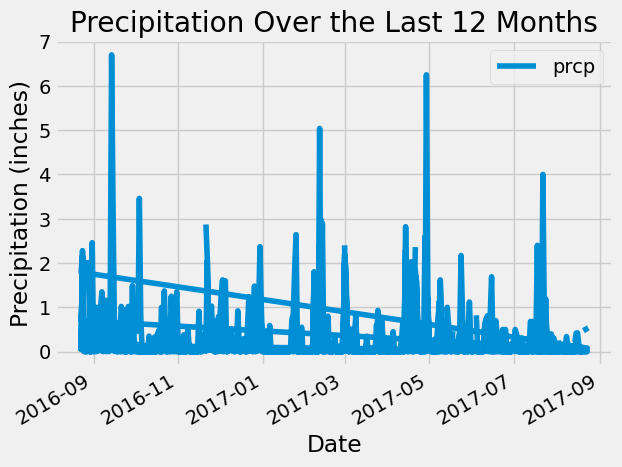

In [81]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
#retrieve the last 12 mos, xpert 


# Calculate the date one year from the last date in data set.
last_12_months_query = f"""
SELECT date, prcp 
FROM measurement 
WHERE date >= date('{most_recent_date}', '-12 months')
"""
print(last_12_months_query)
# Perform a query to retrieve the data and precipitation scores
precipitation_data = pd.read_sql(last_12_months_query, engine)
precipitation_data
# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_data_df = pd.DataFrame(precipitation_data)

# Sort the dataframe by date
precipitation_data['date'] = pd.to_datetime(precipitation_data['date'])
precipitation_data_df.sort_values('date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_data.plot(x='date', y='prcp', title='Precipitation Over the Last 12 Months', xlabel='Date', ylabel='Precipitation (inches)')
#from xpertMake sure to replace 'sqlite:///your_database.db' with the actual connection string for your database.
#from xpertThis code assumes you have a table named precipitation_data with columns date and prcp.

In [ ]:
precipitation_data_df.columns


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

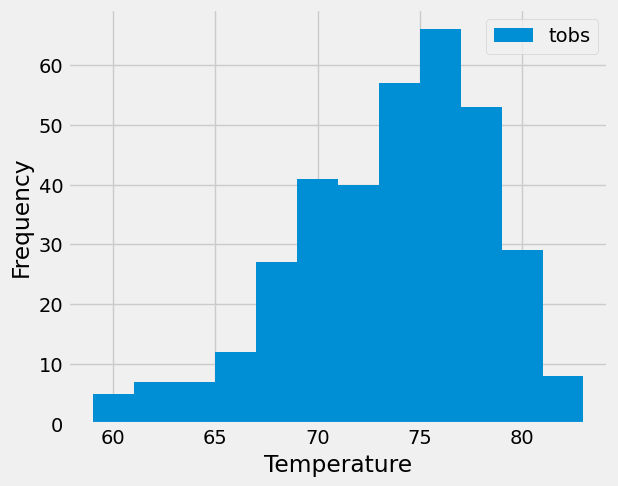

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [122]:
# Close Session
session.close()